In [9]:
pip install scikit-learn


     ---------------------------------------- 8.3/8.3 MB 9.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True )

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
from sklearn.model_selection import train_test_split

x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [58]:
x_train,  x_test , y_train, y_test = train_test_split(x,y, test_size=0.2)

In [17]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9856,-121.86,36.58,20.0,6332.0,991.0,2668.0,955.0,5.7578,<1H OCEAN,347700.0
1336,-121.88,37.99,16.0,3787.0,515.0,1606.0,507.0,5.5676,INLAND,174200.0
14808,-117.18,32.69,37.0,3112.0,716.0,1304.0,674.0,3.2121,NEAR OCEAN,320800.0
11198,-117.91,33.84,26.0,1156.0,393.0,1880.0,400.0,2.2716,<1H OCEAN,350000.0
2631,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,NEAR OCEAN,79000.0
...,...,...,...,...,...,...,...,...,...,...
16203,-121.28,37.94,48.0,1766.0,444.0,1406.0,421.0,1.7039,INLAND,52700.0
16805,-122.41,37.66,32.0,1385.0,356.0,1096.0,353.0,4.4750,NEAR OCEAN,246700.0
10290,-117.82,33.88,15.0,5392.0,895.0,2531.0,827.0,6.2185,<1H OCEAN,280300.0
13927,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,INLAND,48100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

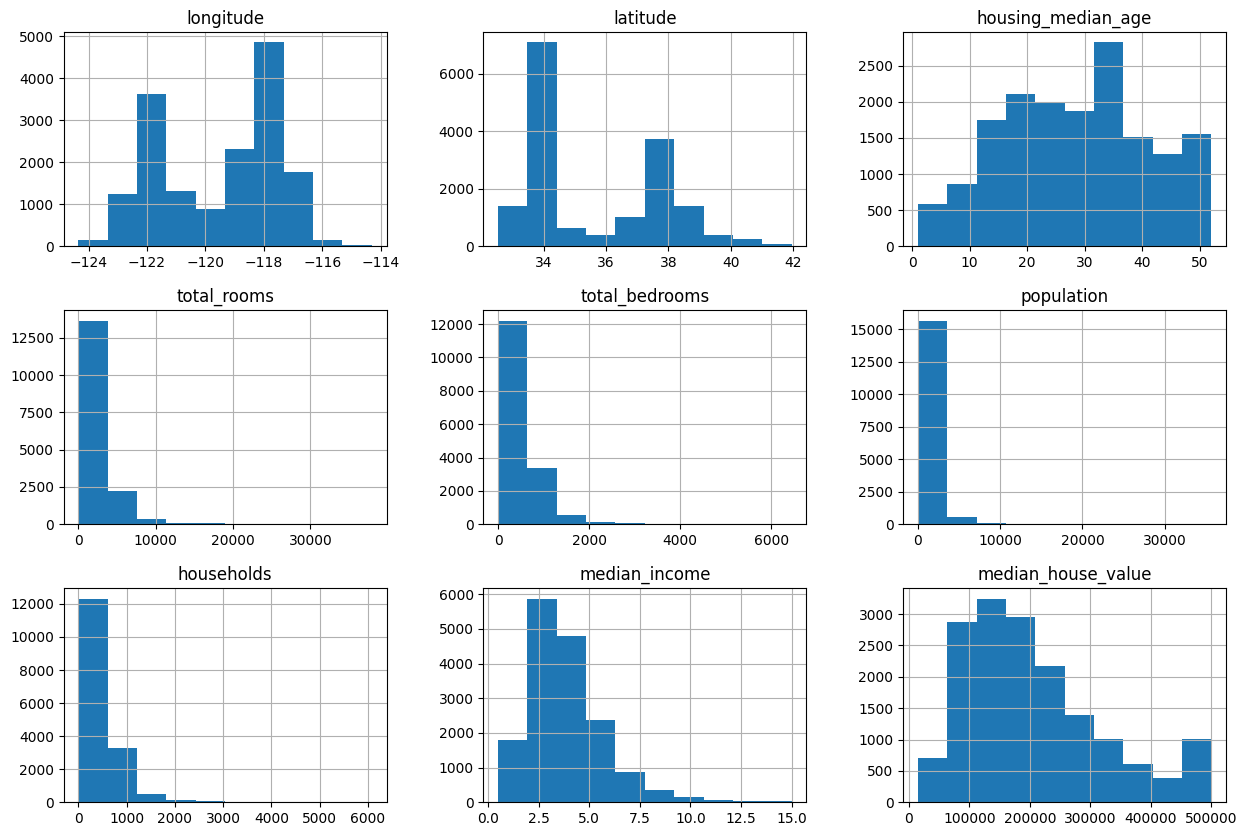

In [19]:
train_data.hist(figsize=(15,10))

<Axes: >

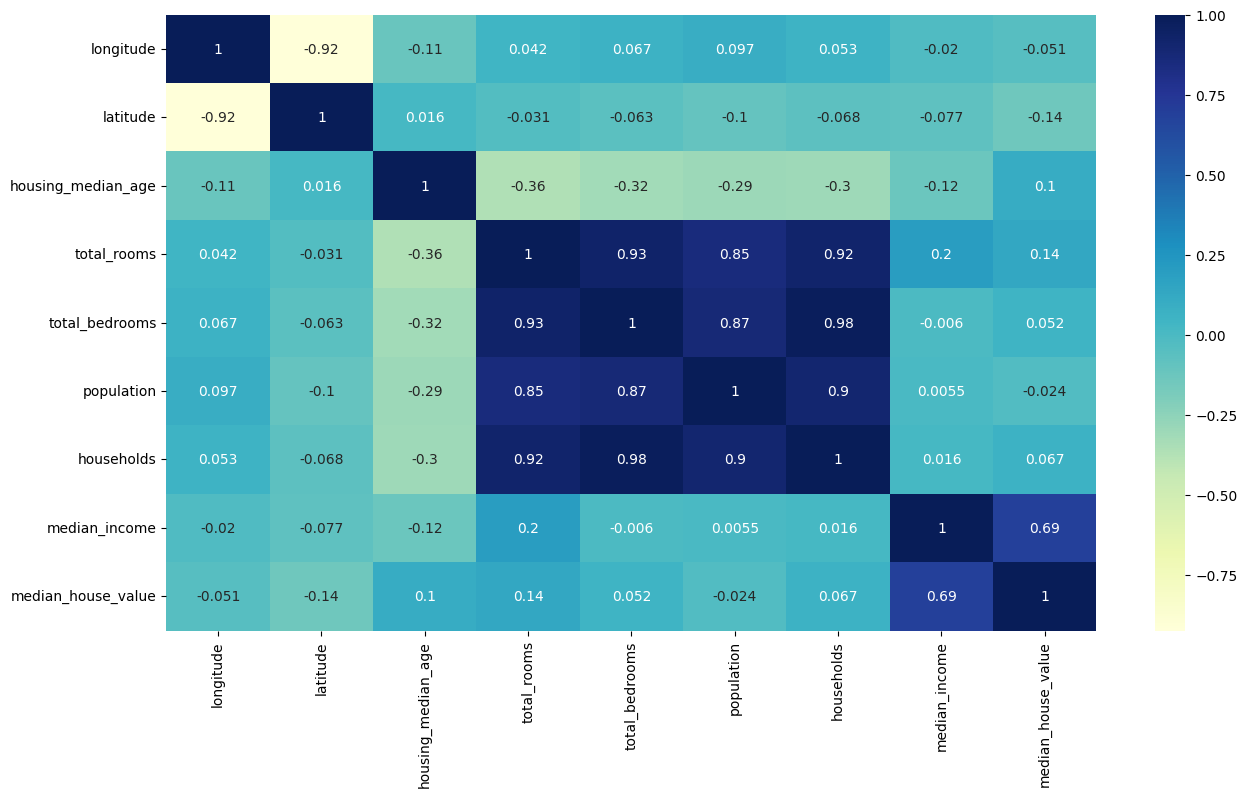

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot= True, cmap ="YlGnBu")

In [27]:
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] + 1)
train_data['population']= np.log(train_data['population'] + 1)
train_data['households']= np.log(train_data['households'] + 1)

Data in above histogram looked skewed, and was not a normal gaussian bell curve . taking log of those features

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

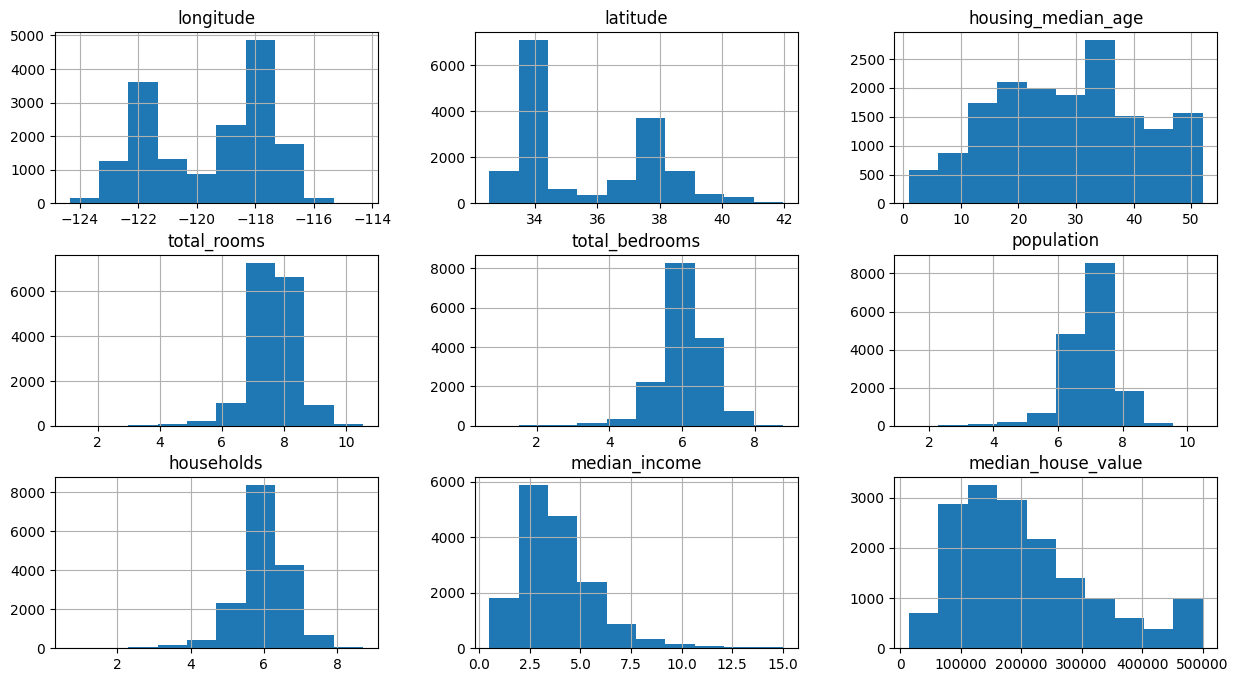

In [28]:
train_data.hist(figsize=(15,8))

In [29]:
train_data.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [40]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9856,-121.86,36.58,20.0,8.753529,6.899723,7.889459,6.862758,5.7578,347700.0,1,0,0,0,0
1336,-121.88,37.99,16.0,8.239593,6.246107,7.382124,6.230481,5.5676,174200.0,0,1,0,0,0
14808,-117.18,32.69,37.0,8.043342,6.575076,7.173958,6.514713,3.2121,320800.0,0,0,0,0,1
11198,-117.91,33.84,26.0,7.053586,5.976351,7.539559,5.993961,2.2716,350000.0,1,0,0,0,0
2631,-124.27,40.69,36.0,7.762171,6.270988,7.085901,6.144186,2.5179,79000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16203,-121.28,37.94,48.0,7.477038,6.098074,7.249215,6.045005,1.7039,52700.0,0,1,0,0,0
16805,-122.41,37.66,32.0,7.234177,5.877736,7.000334,5.869297,4.4750,246700.0,0,0,0,0,1
10290,-117.82,33.88,15.0,8.592857,6.797940,7.836765,6.719013,6.2185,280300.0,1,0,0,0,0
13927,-114.60,34.83,46.0,7.311886,5.736572,6.669498,5.605802,2.1908,48100.0,0,1,0,0,0


<Axes: >

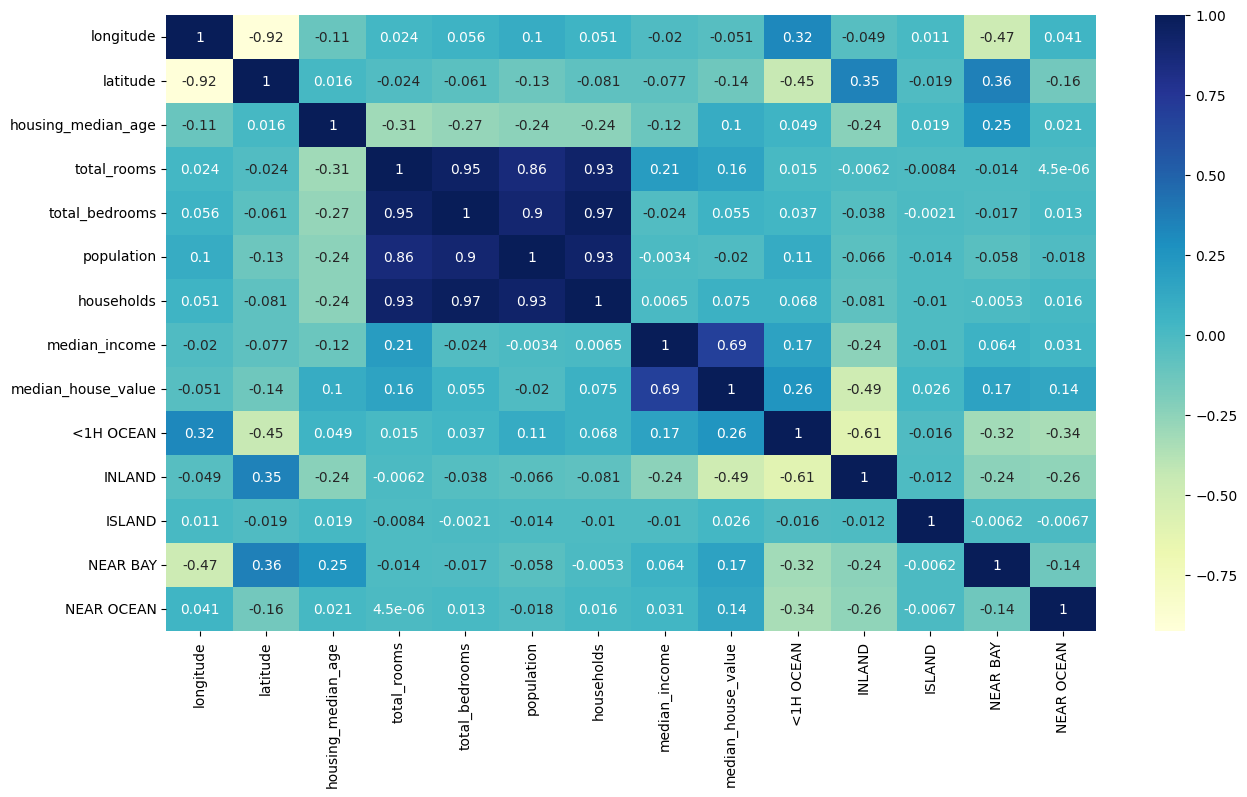

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

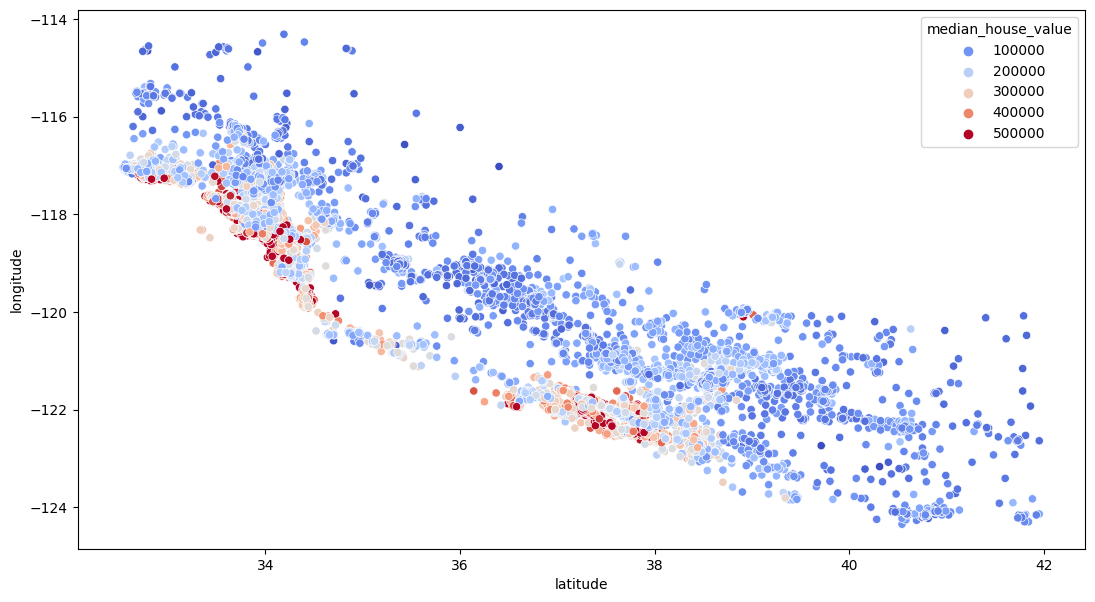

In [45]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='latitude', y='longitude',data=train_data, hue='median_house_value',palette='coolwarm')

In [46]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

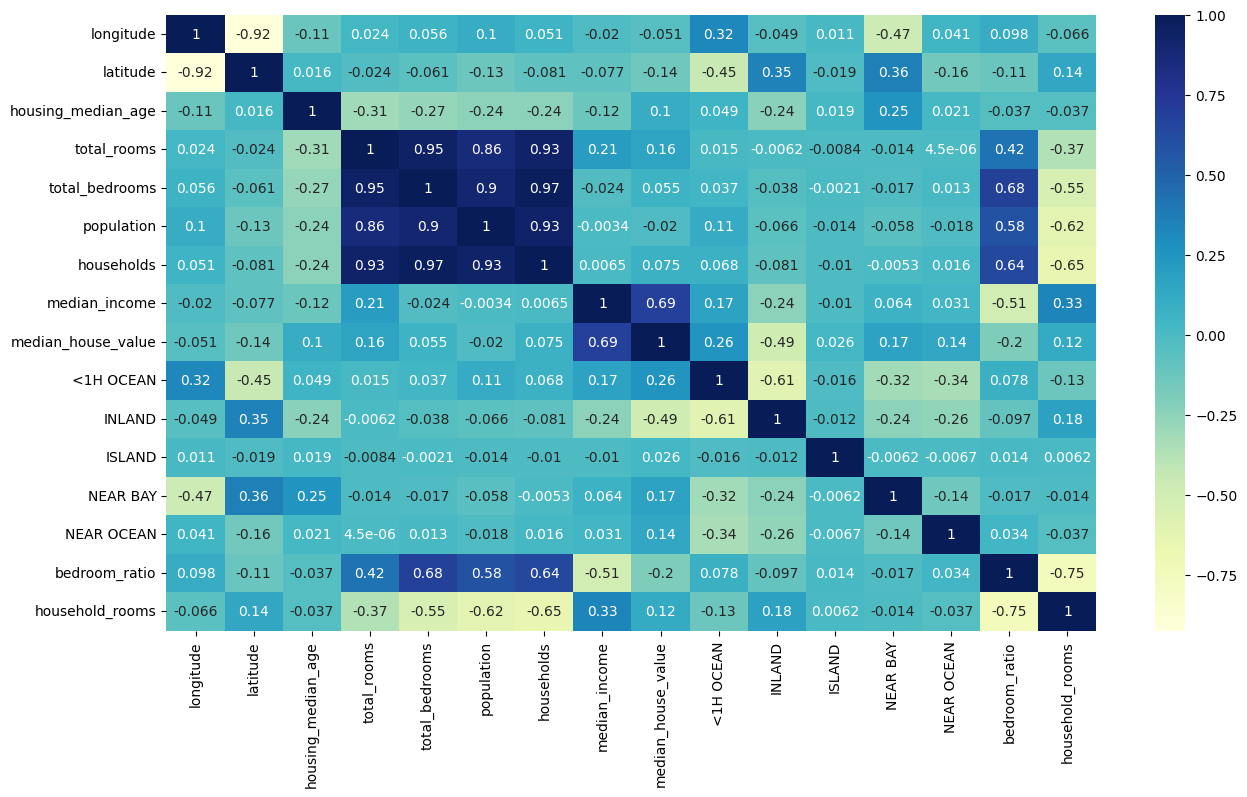

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

# Linear Regression Model

In [73]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [60]:
test_data = x_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms'] + 1)
test_data['population']= np.log(test_data['population'] + 1)
test_data['households']= np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

x_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [74]:
model.score(x_test,y_test)

0.6768571179667848

# Standarization in Linear regression

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_std, y_train)

LinearRegression()

In [80]:
x_test_std = scaler.transform(x_test)

In [81]:
model.score(x_test_std,y_test )

0.6769494046178259

# RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [76]:
forest.score(x_test,y_test)

0.9472016566617605